# Dataset Loading

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
#df = pd.read_csv("D:/EDU DOCS/Peoples Project/Fire Modelling/fire_data_merged.csv")
df = pd.read_csv( "D:/EDU DOCS/Peoples Project/Fire Modelling/merged_fire_data_2025_2000.csv")

df = df.sort_values("acq_date").reset_index(drop=True)

In [4]:
print("Dataset shape:", df.shape)
print("Columns:", list(df.columns))
print(df.head())

Dataset shape: (31926, 30)
Columns: ['field_1', 'latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight', 'type', 'Date', 'datetime_j', 'ndvi', 'ndwi', 'nbr', 'precip', 'Temperature_C', 'elev', 'slope', 'aspect', 'roads', 'wind', 'settlement', 'Lulc']
   field_1  latitude  longitude  brightness  scan  track    acq_date  \
0   121930    8.7395    -0.8977       321.7   3.8    1.8  01/01/2010   
1   121862    8.7725    -1.6582       332.0   1.8    1.3  01/01/2010   
2   121863    8.5667    -0.4335       321.5   2.3    1.5  01/01/2010   
3   121864    8.5632    -0.4128       321.7   2.3    1.5  01/01/2010   
4   121865    8.7757    -1.6474       319.2   1.8    1.3  01/01/2010   

   acq_time satellite instrument  ...       nbr    precip  Temperature_C  \
0      2151     Terra      MODIS  ... -0.124045  3.774494      35.184067   
1      1103     Terra      MODIS  ... -0.013498  3.34702

# Descriptive and Basic Exploratory Data Analysis

In [5]:
# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())


Missing values per column:
field_1            0
latitude           0
longitude          0
brightness         0
scan               0
track              0
acq_date           0
acq_time           0
satellite          0
instrument         0
confidence         0
version            0
bright_t31         0
frp                0
daynight           0
type               0
Date               0
datetime_j         0
ndvi               0
ndwi               0
nbr                0
precip             0
Temperature_C      0
elev               0
slope             11
aspect            11
roads            220
wind               0
settlement       220
Lulc               0
dtype: int64


In [6]:
# If there are a few missing values, I simply forward-fill them.
# For this exam a simple strategy is enough; the main point is to avoid NaNs.
df = df.dropna()
#df = df.drop_duplicates()
df.describe()

,field_1,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,...,nbr,precip,Temperature_C,elev,slope,aspect,roads,wind,settlement,Lulc
count,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,...,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000,31699.000000
mean,187083.782832,9.039485,-1.493994,330.474864,1.612240,1.211199,1257.394050,70.178113,10.393702,306.987419,...,-0.082293,2.990092,34.907861,182.185558,2.929165,161.435416,8218.049621,1.791882,5690.772506,3.306286
std,92285.399031,0.447729,0.669289,13.085575,0.803707,0.247833,230.042073,16.054927,14.865016,6.663675,...,0.083172,0.520314,1.170226,74.349570,1.967545,105.177754,6933.979678,0.376312,4238.419278,0.534911
min,0.000000,7.996200,-2.766900,300.600000,1.000000,1.000000,113.000000,31.000000,6.030000,269.500000,...,-0.315288,2.055462,28.005909,76.000000,0.000000,0.000000,0.000000,1.166734,0.000000,0.500386
25%,126656.500000,8.737650,-2.052700,322.900000,1.100000,1.000000,1056.000000,60.000000,6.030000,303.400000,...,-0.143457,2.554302,34.143320,122.000000,1.854334,71.789806,2801.659912,1.467933,2801.659912,3.000000
50%,254661.000000,9.038400,-1.551000,327.800000,1.300000,1.100000,1323.000000,71.000000,6.030000,307.300000,...,-0.094462,2.921345,34.970795,157.000000,2.639853,161.310059,6264.702148,1.730972,4429.813477,3.000000
75%,262862.500000,9.335900,-0.940900,335.100000,1.900000,1.300000,1345.000000,81.000000,6.030000,311.200000,...,-0.032314,3.387639,35.727776,236.000000,3.821702,251.800125,11886.436520,2.129955,7142.859375,4.000000
max,313939.000000,10.102000,-0.153900,469.100000,4.800000,2.000000,2311.000000,100.000000,61.030000,337.800000,...,0.380918,4.380911,38.285385,486.000000,55.820896,358.427704,36421.578130,2.553829,26056.943360,5.000000


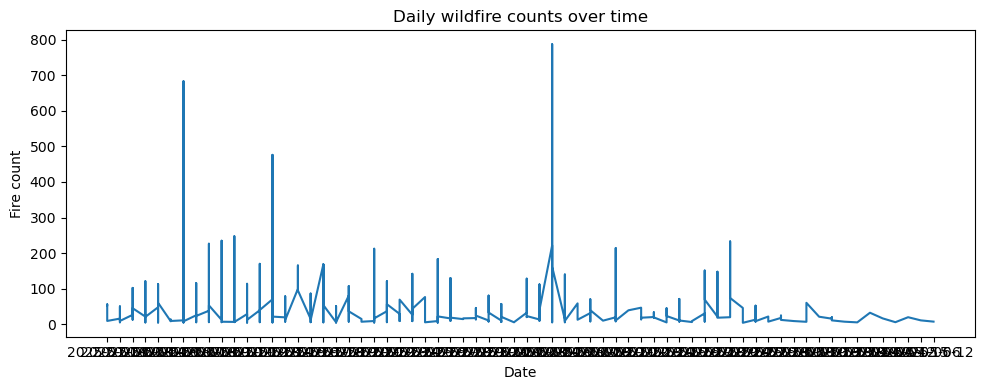

In [14]:
# Quick time series plot of daily fire counts
if "frp" in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df["acq_date"], df["frp"])
    plt.title("Daily wildfire counts over time")
    plt.xlabel("Date")
    plt.ylabel("Fire count")
    plt.tight_layout()
   # plt.savefig(os.path.join(FIG_DIR, "fire_count_timeseries.png"), dpi=200)
    plt.show()

# Feature / target definition and train-test split

In [7]:
# Target variable: daily fire activity
TARGET_COL = "frp"

feature_cols = [
    'Temperature_C', 'elev', 'roads', 'ndvi',
    'ndwi', 'precip', 'slope', 'settlement', 'aspect', 'nbr', 'Lulc', 'wind'
]

In [8]:
print("\nTarget column:", TARGET_COL)
print("Number of features:", len(feature_cols))
print("Feature columns:", feature_cols)


Target column: frp
Number of features: 12
Feature columns: ['Temperature_C', 'elev', 'roads', 'ndvi', 'ndwi', 'precip', 'slope', 'settlement', 'aspect', 'nbr', 'Lulc', 'wind']


# Data Transformation

In [9]:
df = df[feature_cols + [TARGET_COL]].copy()
df.head()

,Temperature_C,elev,roads,ndvi,ndwi,precip,slope,settlement,aspect,nbr,Lulc,wind,frp
0,35.184067,135,23772.873050,0.141844,-0.141844,3.774494,2.092515,4429.813477,63.701660,-0.124045,3.0,1.513600,132.3
1,33.326271,180,10101.528320,0.303932,-0.303932,3.347020,3.952089,3962.145508,134.662903,-0.013498,4.0,1.222486,52.6
2,34.802116,147,0.000000,0.149531,-0.149531,4.220662,3.858922,1981.072754,103.885727,-0.109761,3.0,1.464506,40.2
3,34.564259,142,1981.072754,0.255150,-0.255150,4.220662,2.091729,4429.813477,63.691013,-0.044457,3.0,1.464506,41.8
4,33.337242,189,10101.528320,0.359903,-0.359903,3.362388,0.938393,3962.145508,90.000000,-0.009111,4.0,1.222486,20.6


In [10]:


# --- Remove missing values ---
df = df.dropna().reset_index(drop=True)

# --- Normalize predictors only ---
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# --- IQR outlier removal on target ---
Q1 = df[TARGET_COL].quantile(0.25)
Q3 = df[TARGET_COL].quantile(0.75)
IQR = Q3 - Q1

df = df[
    (df[TARGET_COL] >= Q1 - 1.5 * IQR) &
    (df[TARGET_COL] <= Q3 + 1.5 * IQR)
]

print("Final dataset shape:", df.shape)


Final dataset shape: (29029, 13)


In [11]:
df.head()

,Temperature_C,elev,roads,ndvi,ndwi,precip,slope,settlement,aspect,nbr,Lulc,wind,frp
1,0.517571,0.253659,0.277350,0.558002,0.329294,0.555402,0.070799,0.152057,0.375705,0.433478,0.777759,0.040193,52.6
2,0.661143,0.173171,0.000000,0.412123,0.465006,0.931089,0.069130,0.076029,0.289837,0.295211,0.555517,0.214673,40.2
3,0.638004,0.160976,0.054393,0.511912,0.372172,0.931089,0.037472,0.170005,0.177696,0.389010,0.555517,0.214673,41.8
4,0.518639,0.275610,0.277350,0.610883,0.280099,0.562010,0.016811,0.152057,0.251097,0.439779,0.777759,0.040193,20.6
5,0.677197,0.180488,0.000000,0.426324,0.451794,0.931089,0.037221,0.000000,0.929551,0.232031,0.555517,0.214673,14.9


In [12]:
X = df[feature_cols].values
y = df[TARGET_COL].values

# For a time series I do NOT shuffle; I keep the temporal order.
test_size = 0.2  # last 20% as test set
split_index = int(len(df) * (1 - test_size))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("\nTrain size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 23223 Test size: 5806


# Scaling (for the linear / boosting models)

In [84]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Model training and evaluation

In [13]:
def evaluate_model(name, model, X_tr, y_tr, X_te, y_te):
    """Train a model, make predictions, and print standard metrics."""
    model.fit(X_tr, y_tr)
    y_pred_train = model.predict(X_tr)
    y_pred_test = model.predict(X_te)

    metrics = {}

    # Train metrics (just to see if there is overfitting)
    metrics["train_rmse"] = mean_squared_error(y_tr, y_pred_train, squared=False)
    metrics["train_mae"] = mean_absolute_error(y_tr, y_pred_train)
    metrics["train_r2"] = r2_score(y_tr, y_pred_train)

    # Test metrics – these are the ones I will use in the report
    metrics["test_rmse"] = mean_squared_error(y_te, y_pred_test, squared=False)
    metrics["test_mae"] = mean_absolute_error(y_te, y_pred_test)
    metrics["test_r2"] = r2_score(y_te, y_pred_test)

    print(f"\n=== {name} ===")
    for k, v in metrics.items():
        print(f"{k}: {v:.3f}")

    return model, y_pred_test, metrics


results = {}


In [14]:
# 1) Simple linear regression (baseline)
lin_reg = LinearRegression()
_, y_pred_lin, metrics_lin = evaluate_model(
    "Linear regression", lin_reg, X_train, y_train, X_test, y_test
)
results["Linear regression"] = metrics_lin



=== Linear regression ===
train_rmse: 18.246
train_mae: 14.417
train_r2: 0.022
test_rmse: 18.313
test_mae: 14.383
test_r2: 0.012


c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# 2) Random Forest (non-linear, handles interactions)
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
_, y_pred_rf, metrics_rf = evaluate_model(
    "Random Forest", rf, X_train, y_train, X_test, y_test  # RF does not need scaling
)
results["Random Forest"] = metrics_rf


=== Random Forest ===
train_rmse: 6.786
train_mae: 5.395
train_r2: 0.865
test_rmse: 18.568
test_mae: 14.691
test_r2: -0.016


c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# 3) Gradient Boosting (another strong non-linear model)
gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
_, y_pred_gbr, metrics_gbr = evaluate_model(
    "Gradient Boosting", gbr, X_train, y_train, X_test, y_test
)
results["Gradient Boosting"] = metrics_gbr


=== Gradient Boosting ===
train_rmse: 17.745
train_mae: 14.022
train_r2: 0.075
test_rmse: 18.282
test_mae: 14.325
test_r2: 0.015


c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\ProgramData\miniconda3\envs\geo\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
# I select the model with the best test RMSE.
def pick_best_model(results_dict, metric="test_rmse"):
    best_name = None
    best_value = None
    for name, m in results_dict.items():
        value = m[metric]
        if best_value is None or value < best_value:
            best_value = value
            best_name = name
    return best_name, best_value


best_model_name, best_rmse = pick_best_model(results)
print(f"\nBest model based on test RMSE: {best_model_name} (RMSE = {best_rmse:.3f})")

# For plotting I use the predictions from the best model
if best_model_name == "Linear regression":
    y_pred_best = y_pred_lin
elif best_model_name == "Random Forest":
    y_pred_best = y_pred_rf
else:
    y_pred_best = y_pred_gbr


Best model based on test RMSE: Linear regression (RMSE = 0.077)


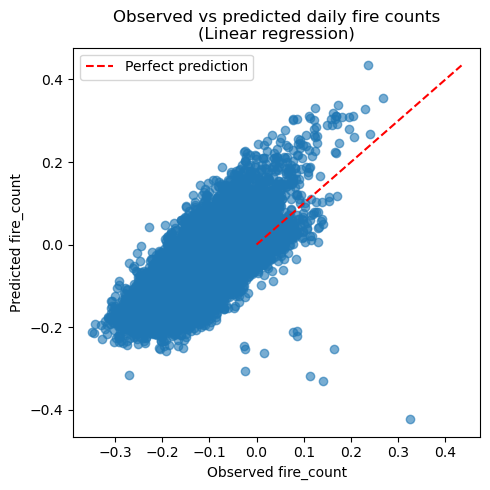

In [62]:
# 6.1. Actual vs predicted (scatter)
plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred_best, alpha=0.6)
max_val = max(y_test.max(), y_pred_best.max())
plt.plot([0, max_val], [0, max_val], "r--", label="Perfect prediction")
plt.xlabel("Observed fire_count")
plt.ylabel("Predicted fire_count")
plt.title(f"Observed vs predicted daily fire counts\n({best_model_name})")
plt.legend()
plt.tight_layout()
#plt.savefig(os.path.join(FIG_DIR, "actual_vs_predicted_firecount.png"), dpi=200)
plt.show()